## Supplement Figure S9

This Notebook reproduces Figure S9, which shows the acceptance corrected and smeared templates that are used in the GP analysis.
Note that these will differ from the original model templates due to the applied acceptance correction and optional smearing.
The original KRA-$\gamma$ templates are provided on zenodo at this location: https://zenodo.org/record/7070823 and the $\pi^0$ template is located here: https://galprop.stanford.edu/PaperIISuppMaterial/SS_Z4_R20_T150_C5.tar .

## Import required libraries

In [1]:
import pandas as pd
import healpy as hp

## Load Data

The provided data file contains the acceptance corrected and smeared templates (no smearing, 7°, 15°) for each of the Galactic plane models ($\pi^0$, KRA$_\gamma^{5}$, KRA$_\gamma^{50}$). Each column in the data table corresponds to one of these templates, where the rows correspond to the healpix index.

In [2]:
df_templates = pd.read_csv('templates.csv')
df_templates

,pi0_0deg,pi0_7deg,pi0_15deg,kra5_0deg,kra5_7deg,kra5_15deg,kra50_0deg,kra50_7deg,kra50_15deg
0,0.102621,0.064199,0.098572,0.042213,0.042136,0.058114,0.039340,0.039272,0.054371
1,0.100680,0.061740,0.095866,0.040545,0.039988,0.056495,0.037785,0.037270,0.052855
2,0.089336,0.061508,0.095454,0.026351,0.040058,0.056396,0.024556,0.037335,0.052763
3,0.094158,0.063947,0.098160,0.039060,0.042221,0.058019,0.036402,0.039352,0.054283
4,0.097156,0.066282,0.100798,0.042197,0.043925,0.059436,0.039325,0.040941,0.055610
...,...,...,...,...,...,...,...,...,...
196603,0.036324,0.039284,0.060020,0.021255,0.021541,0.054422,0.021108,0.021391,0.054563
196604,0.038519,0.039805,0.060762,0.021689,0.021979,0.054790,0.021538,0.021825,0.054911
196605,0.035258,0.040650,0.062510,0.020933,0.022612,0.056692,0.020788,0.022455,0.056819
196606,0.035189,0.040774,0.063164,0.020335,0.022672,0.057849,0.020194,0.022515,0.058001


## Plot templates

These plots reproduce Figure S9, but also show the analysis templates for the KRA$_\gamma^{50}$.

/home/mhuennefeld/software/virtualenvs/tensorflow2.3_py3-v4.1.0_csky/lib/python3.7/site-packages/healpy/projaxes.py:920: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  newcm.set_over(newcm(1.0))
/home/mhuennefeld/software/virtualenvs/tensorflow2.3_py3-v4.1.0_csky/lib/python3.7/site-packages/healpy/projaxes.py:921: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  newcm.set_under(bgcolor)
/home/mhuennefeld/software/virtualenvs/tensorflow2.3_py3-v4.1.0_csky/lib/python3.7/site-packages/healpy/projaxes.py:922: Matpl

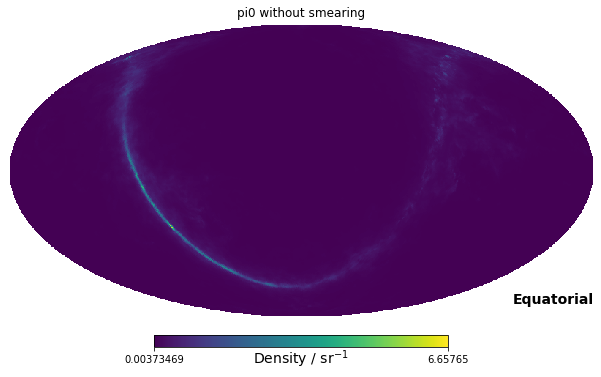

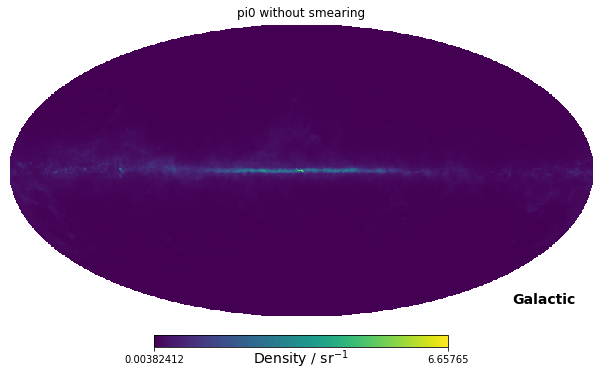

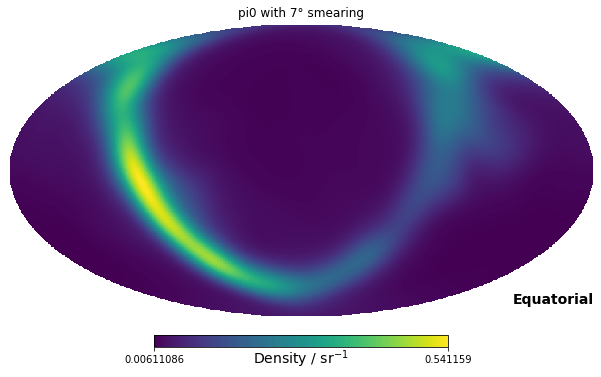

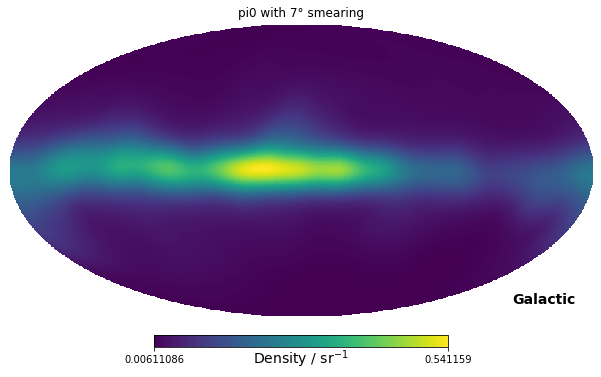

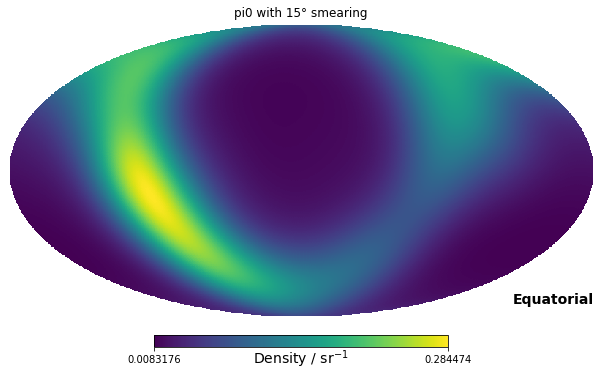

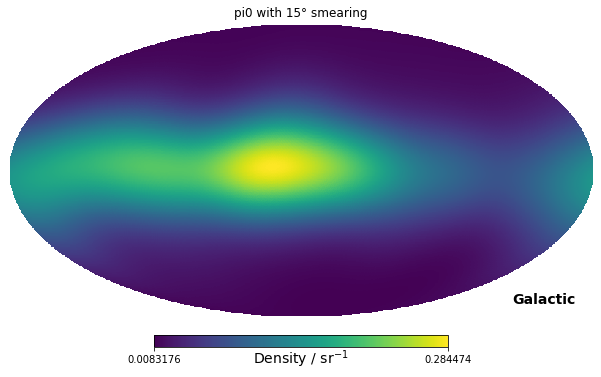

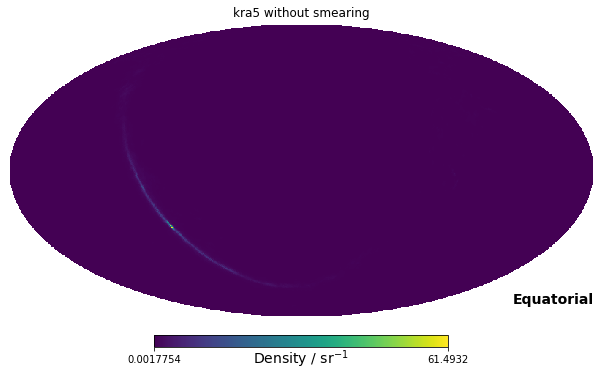

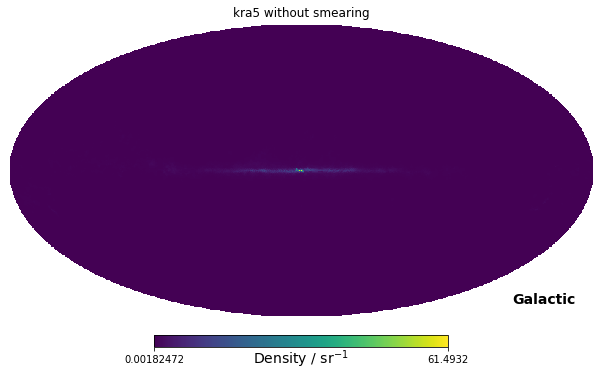

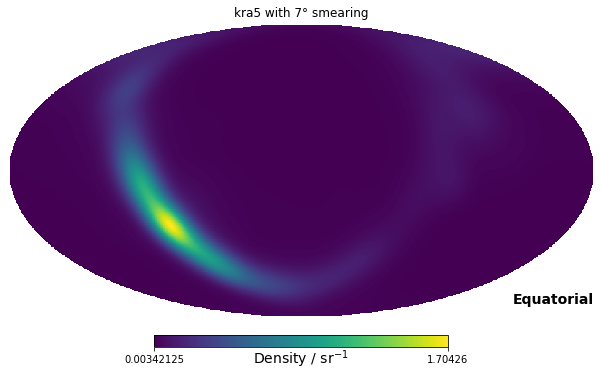

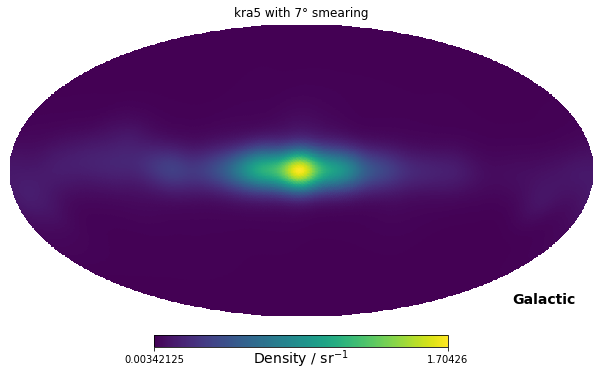

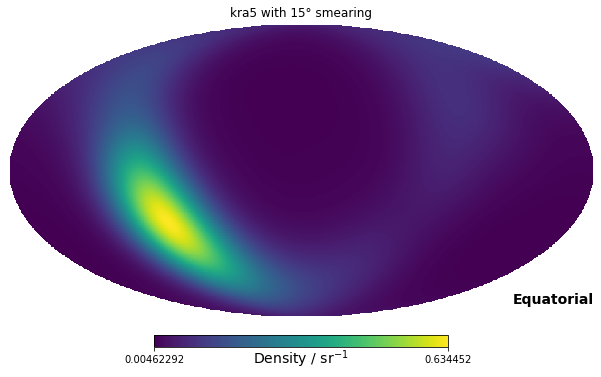

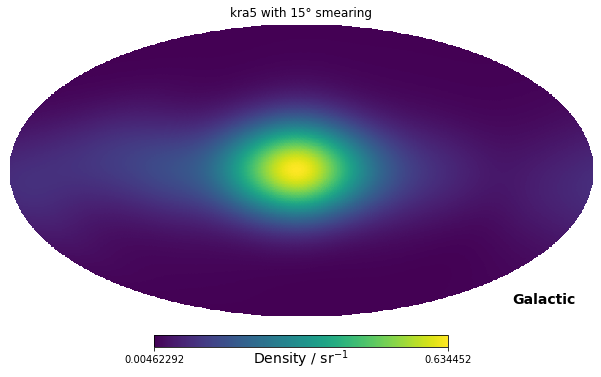

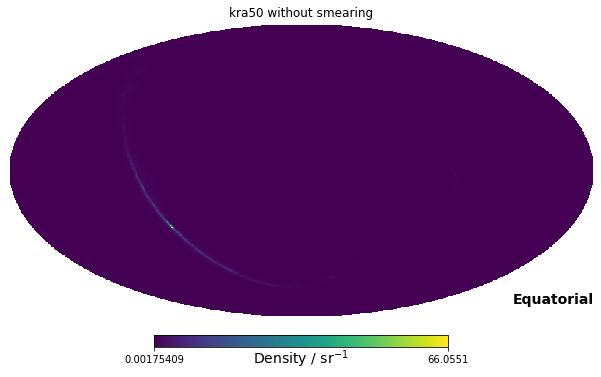

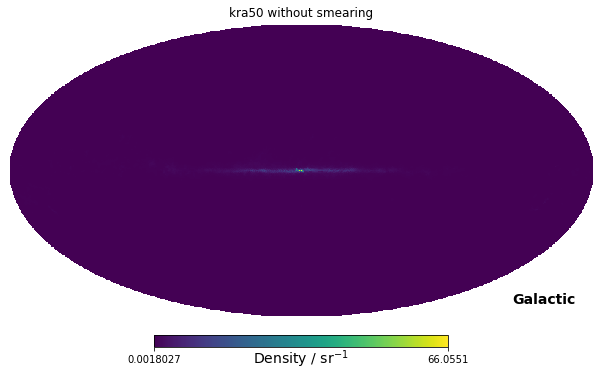

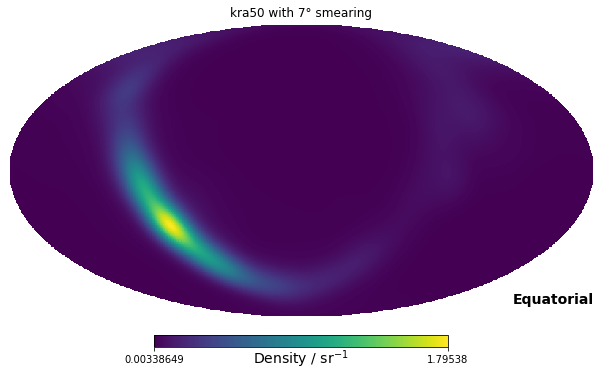

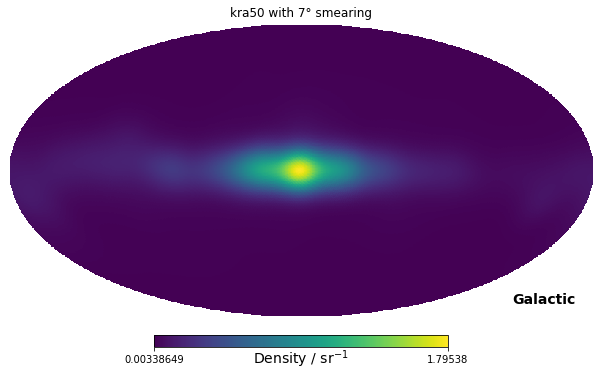

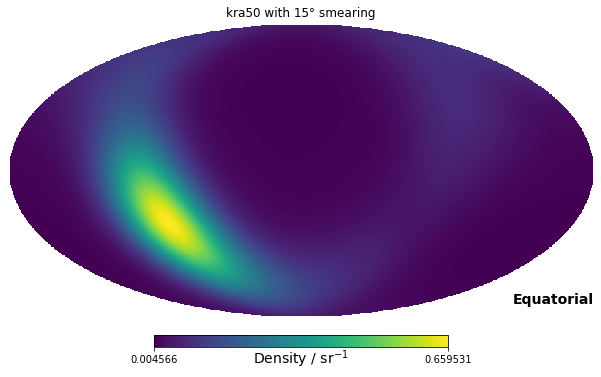

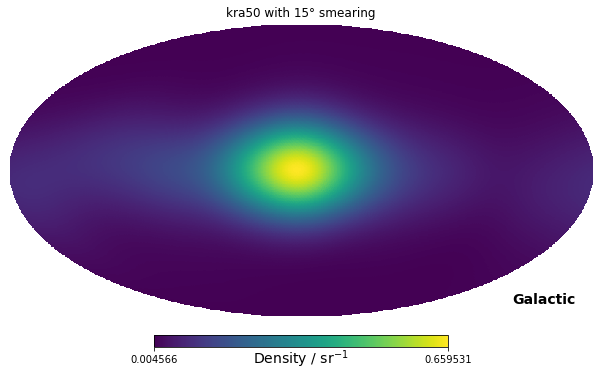

In [3]:
for key in df_templates.keys():
    
    # extract smearing and template name
    name = key.split('_')[0]
    smearing_deg = key.split('_')[1].replace('deg', '')
    
    if smearing_deg == '0':
        smearing_str = 'without smearing'
    else:
        smearing_str = 'with {}° smearing'.format(smearing_deg)
    
    # plot template in equatorial coordinates
    hp.mollview(
        df_templates[key], 
        rot=(180, 0), 
        coord='C',
        unit='Density / sr$^{-1}$', 
        title='{} {}'.format(name, smearing_str),
    )
    
    # plot template in galactic coordinates
    hp.mollview(
        df_templates[key], 
        coord='CG',
        unit='Density / sr$^{-1}$', 
        title='{} {}'.format(name, smearing_str),
    )
